In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from numpy import log
import math
from pmdarima.arima.utils import ndiffs
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


#Data for years 2015-2018 are stored in a single file for each year
data2015 = pd.read_csv("mixed_cities/2015H1.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2016 = pd.read_csv("mixed_cities/2016H1.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2017 = pd.read_csv("mixed_cities/2017H1.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2018 = pd.read_csv("mixed_cities/2018H1.csv", skiprows=4, parse_dates=["Date"], index_col="Date")

#Data for year 2019 are stored in 4 different files, collecting them all
data2019Q1 = pd.read_csv("mixed_cities/2019Q1.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2019Q2 = pd.read_csv("mixed_cities/2019Q2.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2019Q3 = pd.read_csv("mixed_cities/2019Q3.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2019Q4 = pd.read_csv("mixed_cities/2019Q4.csv", skiprows=4, parse_dates=["Date"], index_col="Date")

#Data for year 2020 are stored in 4 different files, collecting them all
data2020Q1 = pd.read_csv("mixed_cities/2020Q1.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2020Q2 = pd.read_csv("mixed_cities/2020Q2.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2020Q3 = pd.read_csv("mixed_cities/2020Q3.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2020Q4 = pd.read_csv("mixed_cities/2020Q4.csv", skiprows=4, parse_dates=["Date"], index_col="Date")

#Data for year 2021 are stored in 4 different files, collecting them all
data2021Q1 = pd.read_csv("mixed_cities/2021Q1.csv", parse_dates=["Date"], index_col="Date")
data2021Q2 = pd.read_csv("mixed_cities/2021Q2.csv", parse_dates=["Date"], index_col="Date")
data2021Q3 = pd.read_csv("mixed_cities/2021Q3.csv", parse_dates=["Date"], index_col="Date")
data2021Q4 = pd.read_csv("mixed_cities/2021Q4.csv", parse_dates=["Date"], index_col="Date")

#Data for year 2022
data2022 = pd.read_csv("mixed_cities/2022.csv", parse_dates=["Date"], index_col="Date")

#concatenate the different dataframes collected for years 2019-2021 and concatenate them into one dataframe per year
all2019 = [data2019Q1, data2019Q2, data2019Q3, data2019Q4]
all2020 = [data2020Q1, data2020Q2, data2020Q3, data2020Q4]
all2021 = [data2021Q1, data2021Q2, data2021Q3, data2021Q4]

data2019 = pd.concat(all2019)
data2020 = pd.concat(all2020)
data2021 = pd.concat(all2021)



#The column 'Specie' holds the pollutants and weather conditions that affect air pollution
#To manage each pollutant as a separate time series, I made every unique value in 'Specie' into a separate column
#If there are multiple rows of the same [date, country, city] and the same pollutant I store the mean of the values

cleaned2015 = data2015.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2016 = data2016.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2017 = data2017.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2018 = data2018.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2019 = data2019.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2020 = data2020.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2021 = data2021.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2022 = data2022.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()

#'Date' should be the index of the time series
cleaned2015 = cleaned2015.set_index('Date')
cleaned2016 = cleaned2016.set_index('Date')
cleaned2017 = cleaned2017.set_index('Date')
cleaned2018 = cleaned2018.set_index('Date')
cleaned2019 = cleaned2019.set_index('Date')
cleaned2020 = cleaned2020.set_index('Date')
cleaned2021 = cleaned2021.set_index('Date')
cleaned2022 = cleaned2022.set_index('Date')

In [2]:
#DATA BEFORE MAKING EACH POLLUTANT A SEPARATE COLUMN
data2015

,Country,City,Specie,count,min,max,median,variance
Date,,,,,,,,
2015-01-06,KR,Jeonju,co,124,0.1,12.3,4.5,55.74
2015-01-22,KR,Jeonju,co,116,4.5,10.0,6.7,16.09
2015-03-30,KR,Jeonju,co,118,1.2,11.2,5.6,35.98
2015-05-27,KR,Jeonju,co,93,2.3,5.6,3.4,6.54
2015-02-03,KR,Jeonju,co,133,4.5,13.4,7.8,39.24
...,...,...,...,...,...,...,...,...
2015-06-05,MK,Skopje,no2,72,1.3,22.7,4.0,288.64
2015-04-25,MK,Skopje,no2,71,1.3,27.7,4.4,384.63
2015-05-16,MK,Skopje,no2,72,1.0,23.1,6.0,319.02


In [3]:
#DATA AFTER MAKING EACH POLLUTANTS A SEPARATE COLUMN
cleaned2015

,Country,City,aqi,co,mepaqi,neph,no2,o3,pm10,pm25,psi,so2,uvi
Date,,,,,,,,,,,,,
2014-12-29,AT,Graz,,0.1,,,9,,13,,,1.6,
2014-12-29,AT,Innsbruck,,0.1,,,25.6,,25,,,1.6,
2014-12-29,AT,Linz,,0.1,,,14.2,,25,74,,2.1,
2014-12-29,AT,Salzburg,,0.1,,,21.1,,21,,,2.1,
2014-12-29,AT,Vienna,,0.1,,,9,,20,65,,2.6,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-05,US,Tucson,,,,,,28.1,9,21,,,
2015-07-05,US,Washington D.C.,,2.9,,,5.6,15.9,,61,,0.5,
2015-07-05,VN,Hanoi,,8.9,,,20.7,12.5,,,,25.8,


In [4]:
#COLLECT ALL AVAILABLE DATA FOR ATHENS, FROM ALL YEARS
Athens_Data = pd.concat([cleaned2015[cleaned2015['City']=='Athens'], cleaned2016[cleaned2016['City']=='Athens'],
                     cleaned2017[cleaned2017['City']=='Athens'], cleaned2018[cleaned2018['City']=='Athens'], 
                     cleaned2019[cleaned2019['City']=='Athens'], cleaned2020[cleaned2020['City']=='Athens'],
                     cleaned2021[cleaned2021['City']=='Athens'], cleaned2022[cleaned2022['City']=='Athens']])

<AxesSubplot:title={'center':'Athens Pollution through years 2019-2022'}, xlabel='Date'>

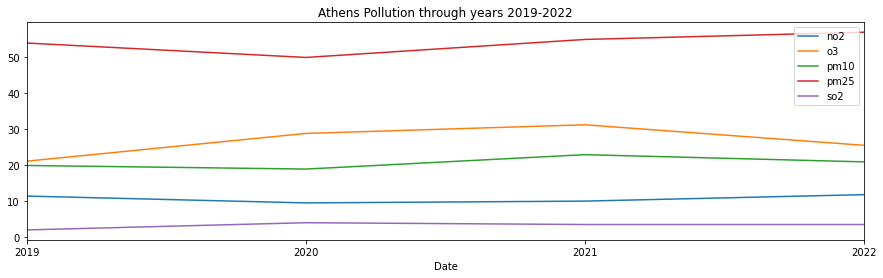

In [5]:
#KEEP ONLY POLLUTANTS COLUMNS AND TRANSFORM THE VALUES TO NUMERIC
cols=['pm25', 'pm10', 'no2', 'o3', 'so2']

Athens_Data = Athens_Data.loc[:, Athens_Data.columns.intersection(cols)]
Athens_Data = Athens_Data.apply(pd.to_numeric, errors='coerce')

Athens_Data.resample("1y").median().plot(figsize=(15,4), title="Athens Pollution through years 2019-2022")

In [6]:
#FILLING NAN VALUES WITH FORWARD FILLING
Athens_Data = Athens_Data.iloc[1: , :]
Athens_Data = Athens_Data.fillna(method='ffill')

#FILLING NAN VALUES WITH BACK FILLING
Athens_Data = Athens_Data.fillna(method='bfill')

In [7]:
#REMOVE DUPLICATE VALUES
print("Athens before:" + str(len(Athens_Data)))

Athens_Data = Athens_Data[~Athens_Data.index.duplicated(keep='first')]

print("Athens after:" + str(len(Athens_Data)))

Athens before:860
Athens after:839


In [8]:
print("Athens:\n" + str(Athens_Data.isna().sum()))

Athens:
no2     0
o3      0
pm10    0
pm25    0
so2     0
dtype: int64


# Auto-ARIMA

RMSE for no2 ARIMA: 5.986391889539512


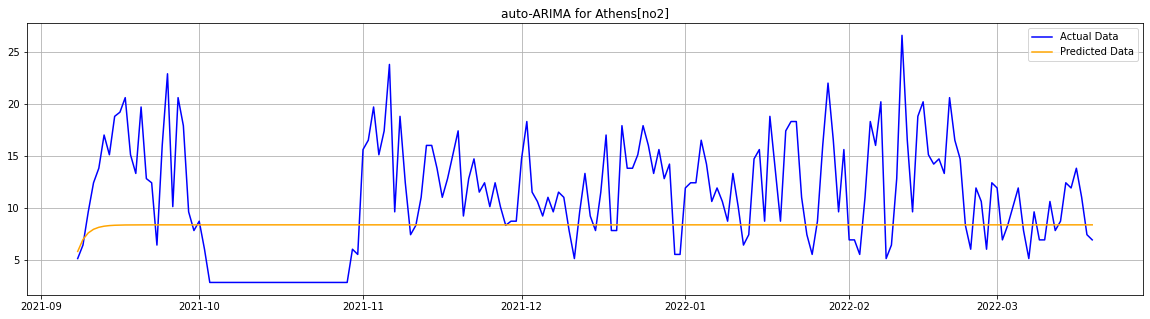

RMSE for o3 ARIMA: 15.505316273528171


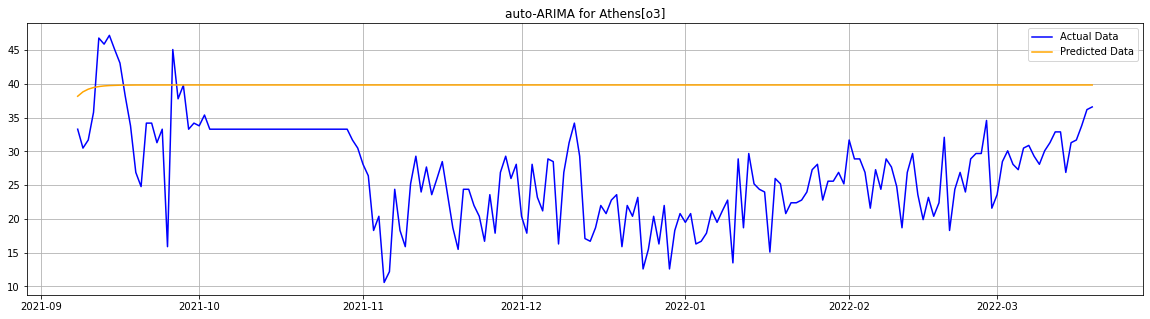

RMSE for pm10 ARIMA: 9.451631252505216


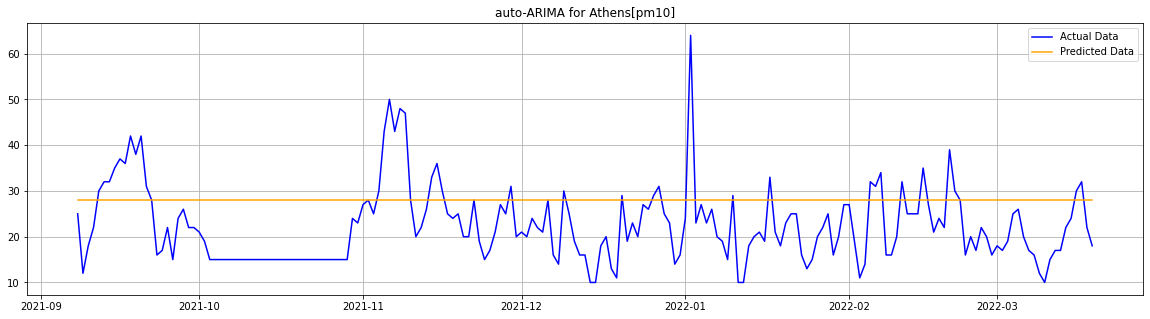

RMSE for pm25 ARIMA: 12.558780603986454


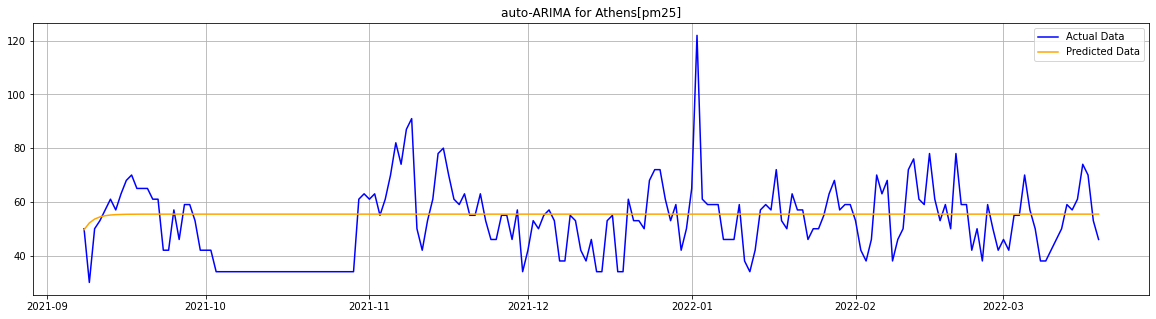

RMSE for so2 ARIMA: 2.324076655388934


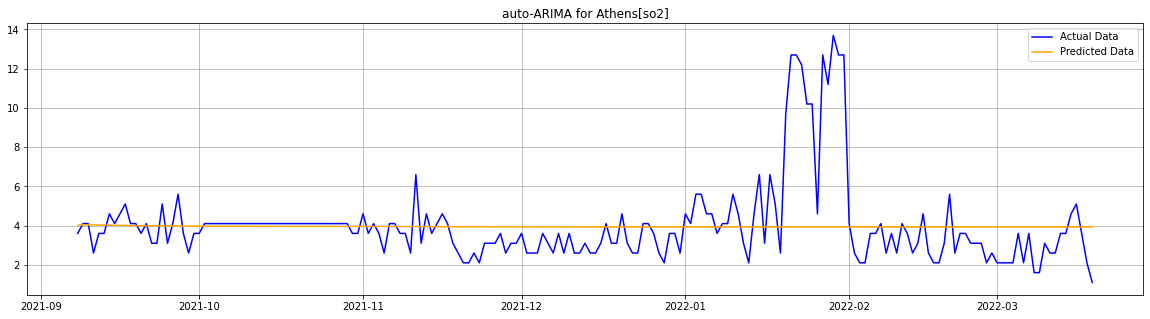

In [25]:
def auto_arima_forecast(city_data, city):
    training_percentage = 0.80
    #THERE ARE FIVE POLLUTANTS, THEREFORE FIVE TIME SERIES TO PREDICT WITH ARIMA
    for col in city_data:
        data = city_data[col]

        #SPLIT DATA INTO TRAIN AND TEST PORTIONS
        train = data[:int(training_percentage*(len(data)))]
        test = data[int(training_percentage*(len(data))):]

        #AUTO-ARIMA MODEL (data is not seasonal as seen from the graph above)
            
        model = auto_arima(train, trace=False, error_action='ignore', suppress_warnings=True, seasonal=False)
        
        #PREDICT AS MANY PERIODS AS THE 'TEST' DATASET'S LENGTH
        forecast = model.predict(n_periods=len(test))
        forecast = pd.DataFrame(forecast,index = test.index,columns=['Forecast'])
        
        #COMPUTE RMSE FOR PREDICTED AND ACTUAL VALUES
        rmse = math.sqrt(mean_squared_error(test, forecast))

        print("RMSE for " + str(col) + " ARIMA: " + str(rmse))
        title = "auto-ARIMA for " + city + "[" + col +"]"
        # Plot the predictions for testation set
        plt.figure(figsize=(20, 5))
        plt.title(title)
        plt.plot(test, label='Actual Data', color='blue')
        plt.plot(forecast, label='Predicted Data', color='orange')
        plt.grid(True)
        plt.legend(loc='best')
        plt.show()

auto_arima_forecast(Athens_Data, "Athens")

# Finding optimal ARIMA parameters manually

In [10]:
#Check data for stationarity to apply the ARIMA model.

#The null hypothesis is that the time series is non-stationary.
#Using the Augmented Dickey Fuller test (adfuller()) we can check for stationarity.
#If p-value < significance level(0.05), the we reject the null hypothesis.
#Otherwise, the time series is non-stationary and needs differencing.

print("Check if Athens_Data is stationary :")
for col in Athens_Data.columns:
    result = adfuller(Athens_Data[col])
    print('p-value for ' + col + ' : %f' % result[1])

Check if Athens_Data is stationary :
p-value for no2 : 0.000000
p-value for o3 : 0.185124
p-value for pm10 : 0.000000
p-value for pm25 : 0.000000
p-value for so2 : 0.000001


In [11]:
#Order of differencing (d) for 'o3', the other pollutants do not need differencing
ndiffs(Athens_Data['o3'], test='adf')

1

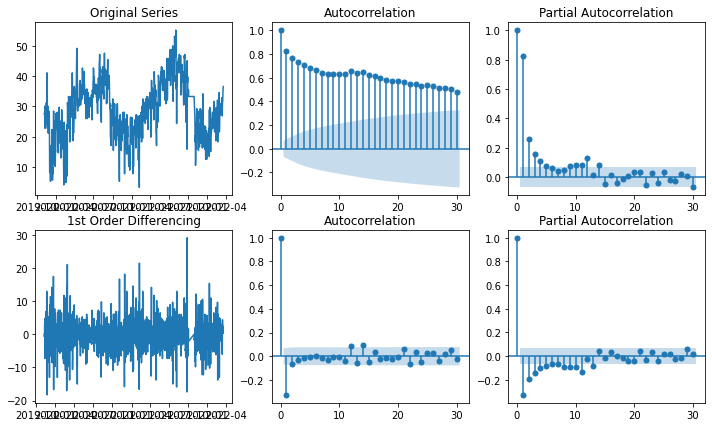

In [12]:
#Ο3
#After checking the results above, the time series that need differencing is Athens_Data['o3'],
#as p-value for o3 : 0.229985 > 0.05
plt.rcParams.update({'figure.figsize':(12,7)})

# Original Series
fig, axes = plt.subplots(2, 3)
axes[0, 0].plot(Athens_Data['o3']); axes[0, 0].set_title('Original Series')
plot_acf(Athens_Data['o3'], ax=axes[0, 1])
plot_pacf(Athens_Data['o3'], ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(Athens_Data['o3'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(Athens_Data['o3'].diff().dropna(), ax=axes[1, 1])
plot_pacf(Athens_Data['o3'].diff().dropna(), ax=axes[1, 2])

plt.show()

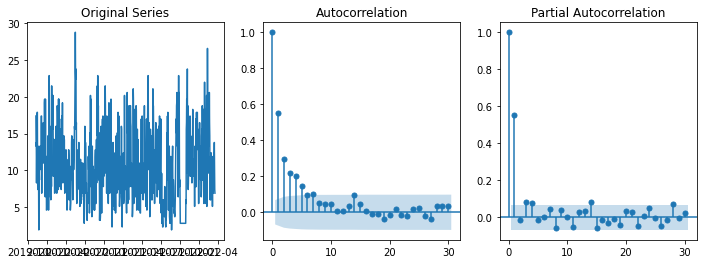

In [13]:
#NO2
plt.rcParams.update({'figure.figsize':(12,4)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Athens_Data['no2']); axes[0].set_title('Original Series')
plot_acf(Athens_Data['no2'], ax=axes[1])
plot_pacf(Athens_Data['no2'], ax=axes[2])

plt.show()

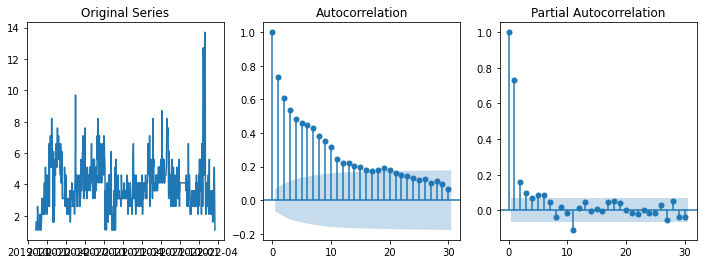

In [14]:
#SO2
plt.rcParams.update({'figure.figsize':(12,4)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Athens_Data['so2']); axes[0].set_title('Original Series')
plot_acf(Athens_Data['so2'], ax=axes[1])
plot_pacf(Athens_Data['so2'], ax=axes[2])

plt.show()

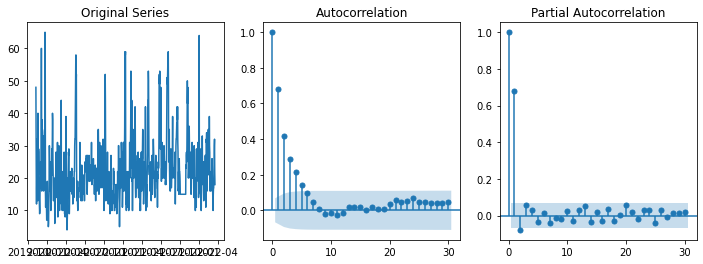

In [15]:
#PM10
plt.rcParams.update({'figure.figsize':(12,4)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Athens_Data['pm10']); axes[0].set_title('Original Series')
plot_acf(Athens_Data['pm10'], ax=axes[1])
plot_pacf(Athens_Data['pm10'], ax=axes[2])

plt.show()

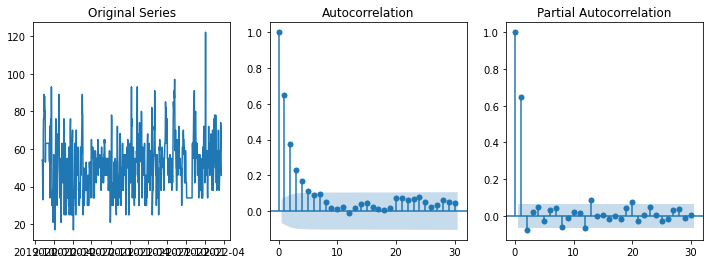

In [16]:
#PM25
plt.rcParams.update({'figure.figsize':(12,4)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Athens_Data['pm25']); axes[0].set_title('Original Series')
plot_acf(Athens_Data['pm25'], ax=axes[1])
plot_pacf(Athens_Data['pm25'], ax=axes[2])

plt.show()

In [17]:
#Για κάθε στήλη φτιάχνονται τα διαγράμματα autocorrelation και partial autocorrelation 
#ώστε να προσδιοριστούν που παράμετροι του Autoregression (p) και Moving Average (q).  
#Το p το βρίσκουμε από το partial autocorrelation plot, μετρώντας πόσα σημεία βρίσκονται 
#εκτός της μπλε σκιασμένης περιοχής. Το q το βρίσκουμε με αντίστοιχο τρόπο από το autocorrelation plot.

In [21]:
#params = (p,d,q)

def manual_ARIMA(data, params):
    
    #SPLIT DATA TO TRAIN AND TEST PORTIONS
    train_size = int(len(data) * 0.8)
    train, test = data[0:train_size], data[train_size:]
    
    #PREDICTIONS WILL BE STORED IN A LIST
    predictions = list()
    
    #HISTORY IS F=GOING TO BE USED AS NEW TRAINING DATA EACH TIME. EVERY PREDICTION IS GOING TO BE
    #ADDED IN THE TRAIN PORTION FOR THE NEXT ITERATION FOR BETTER ACCURACY
    history = [x for x in train]

    for t in range(len(test)):
        #MODEL
        model = ARIMA(history, order=params)
        model_fit = model.fit()
        
        #PREDICT TEST VALUES
        pred = model_fit.forecast()[0]
        predictions.append(pred)
        history.append(test[t])

    error = math.sqrt(mean_squared_error(test, predictions))
    return error, predictions, test

In [22]:
#O3
rmse_o3, predictions_o3, test_o3 = manual_ARIMA(Athens_Data['o3'], (2,1,2))
predictions_o3 = pd.Series(predictions_o3)
predictions_o3.index = test_o3.index

#NO2
rmse_no2, predictions_no2, test_no2 = manual_ARIMA(Athens_Data['no2'], (2,0,6))
predictions_no2 = pd.Series(predictions_no2)
predictions_no2.index = test_no2.index

#SO2
rmse_so2, predictions_so2, test_so2 = manual_ARIMA(Athens_Data['so2'], (3,0,11))
predictions_so2 = pd.Series(predictions_so2)
predictions_so2.index = test_so2.index

#PM10
rmse_pm10, predictions_pm10, test_pm10 = manual_ARIMA(Athens_Data['pm10'], (2,0,5))
predictions_pm10 = pd.Series(predictions_pm10)
predictions_pm10.index = test_pm10.index

#PM25
rmse_pm25, predictions_pm25, test_pm25 = manual_ARIMA(Athens_Data['pm25'], (2,0,5))
predictions_pm25 = pd.Series(predictions_pm25)
predictions_pm25.index = test_pm25.index

RMSE for o3 ARIMA: 5.070187891910838


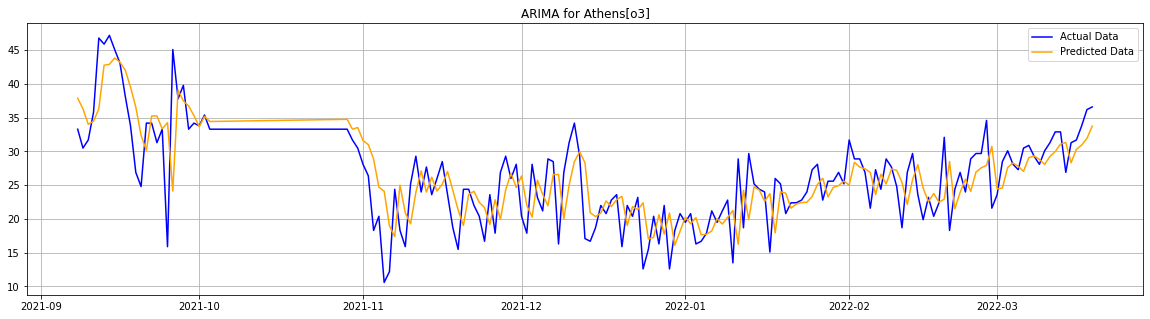

RMSE for no2 ARIMA: 4.217217074776514


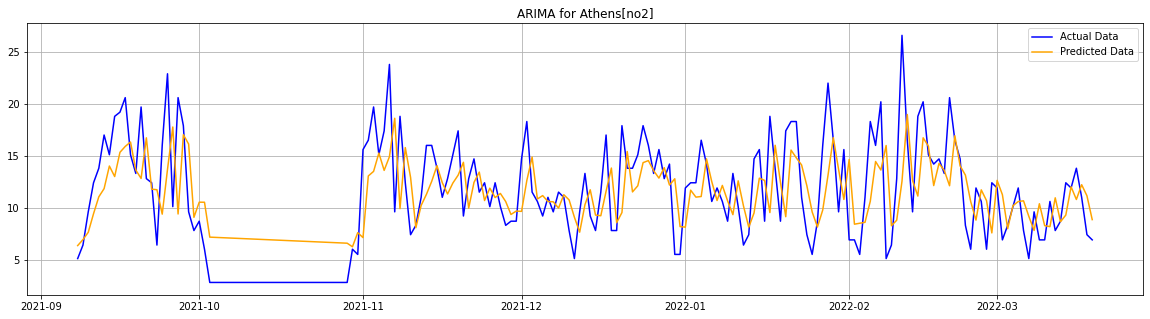

RMSE for so2 ARIMA: 1.579668082026028


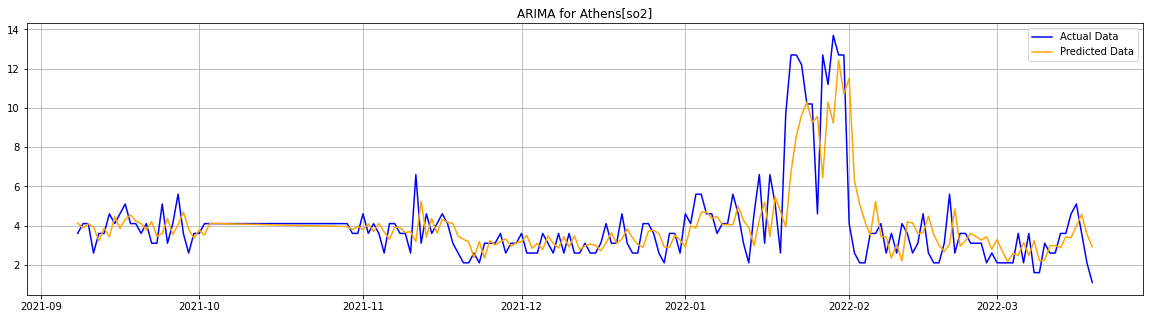

RMSE for pm10 ARIMA: 7.191750619401295


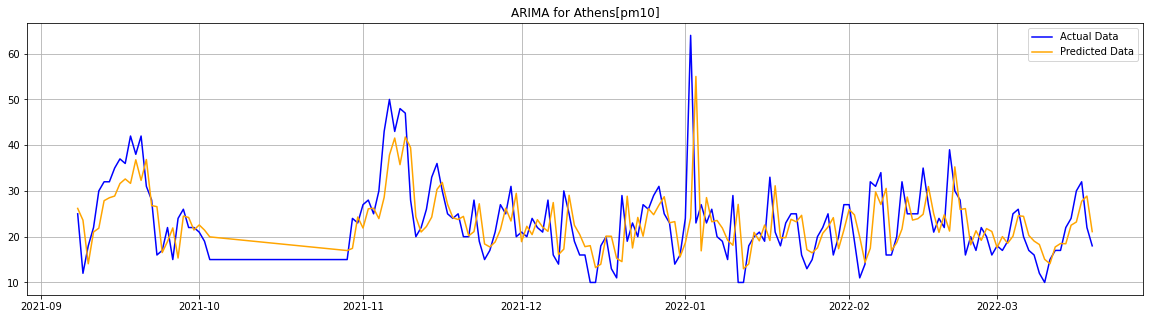

RMSE for pm25 ARIMA: 11.328955372796106


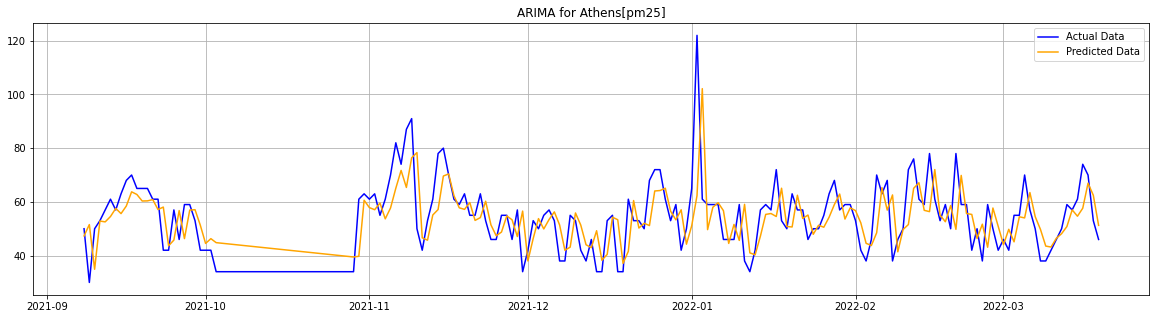

In [23]:
#Plot the predictions against the test values and print the error
i = 0
for col in ['o3', 'no2', 'so2', 'pm10', 'pm25']:
    #rmse, predictions, test = manual_Arima(Athens_Data[col], (2,1,2))
    #predictions = pd.Series(predictions)
    #predictions.index = test.index
    
    test = [test_o3, test_no2, test_so2, test_pm10, test_pm25]
    predictions = [predictions_o3, predictions_no2, predictions_so2, predictions_pm10, predictions_pm25]
    rmse = [rmse_o3, rmse_no2, rmse_so2, rmse_pm10, rmse_pm25]
    print("RMSE for " + str(col) + " ARIMA: " + str(rmse[i]))


    title = "ARIMA for Athens" + "[" + col +"]"
    plt.figure(figsize=(20, 5))
    plt.title(title)
    plt.plot(test[i], label='Actual Data', color='blue')
    plt.plot(predictions[i], label='Predicted Data', color='orange')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()
    
    i=i+1